In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot, gaussian_kde

In [100]:
path = 'C:/Users/keteb/OneDrive/Bureau/github/Portfolio_clusturing/Data/DataBase.csv'
df = pd.read_csv(path)

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() 

df_cleaned = df_cleaned.transpose() 


In [101]:
df_cleaned.max().max()
df_cleaned.min().min()
df_cleaned

ticker,AA,ABM,ABT,ADI,ADM,ADX,AEE,AEG,AEM,AEP,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,XRX,YUM,ZTR
03/01/2000,-0.013042,-0.009188,-0.007117,-0.036071,0.000000,-0.001867,-0.007707,0.014739,-0.008658,-0.017734,...,-0.021967,-0.003376,-0.016349,-0.017490,-0.022942,-0.028632,-0.016647,0.034169,-0.032952,0.000000
04/01/2000,0.010043,0.012346,-0.012786,-0.044261,0.005277,-0.005666,0.000000,-0.018361,0.018019,0.013848,...,-0.014930,-0.025793,-0.009145,-0.031198,-0.019337,-0.015915,-0.007296,-0.047628,-0.011895,0.018868
05/01/2000,0.047628,-0.006192,0.011111,0.014493,-0.015915,0.000000,0.037955,-0.012089,-0.017858,0.036648,...,-0.002794,0.001810,0.010471,0.002866,-0.014799,-0.016645,0.037740,0.021506,0.000000,0.009479
06/01/2000,-0.011713,0.000000,0.032553,-0.027719,0.010695,0.005742,-0.003731,-0.003409,0.026907,0.013270,...,0.013341,-0.022196,0.011656,0.000000,0.004255,0.004829,0.052842,0.007926,-0.001714,0.009390
07/01/2000,-0.016118,0.003091,0.028573,0.033654,0.005249,0.003810,0.012975,0.000667,0.026202,0.007463,...,0.025864,0.027331,0.043898,0.006845,0.011073,0.035384,-0.011705,0.023408,-0.022551,0.009217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2020,-0.017156,-0.011338,0.008434,0.002495,0.000607,-0.000584,0.008141,0.000000,0.012527,0.007149,...,-0.001363,0.004893,0.004205,0.004913,0.002425,0.001141,-0.001201,-0.014509,0.002980,0.003446
28/12/2020,0.006315,0.009932,-0.010796,-0.011887,-0.002010,0.004078,0.001565,-0.005128,-0.027193,-0.005643,...,-0.005320,0.001380,0.004172,-0.000813,-0.002681,0.001630,0.001199,0.020396,0.011820,0.005705
29/12/2020,-0.004527,-0.024098,-0.001568,-0.010525,-0.008056,-0.004066,-0.003650,-0.012772,0.004506,-0.003320,...,-0.011128,-0.010187,-0.005503,-0.002600,0.000089,-0.003188,-0.018486,-0.019023,-0.001643,0.000000
30/12/2020,0.039099,-0.002646,-0.002303,0.010522,0.009259,0.001745,0.004819,0.000000,0.005840,0.005659,...,0.004663,-0.003997,-0.002237,0.004380,-0.002224,0.002430,0.006512,0.010099,0.001462,-0.002275


In [102]:
(df_cleaned.tail(253).mean() > df_cleaned.head(251).mean()).value_counts()
457/663 * 100

68.92911010558069

In [103]:
rolling_mean = df.transpose().rolling(window=20).mean()

In [104]:
rolling_mean.shape

(5279, 695)

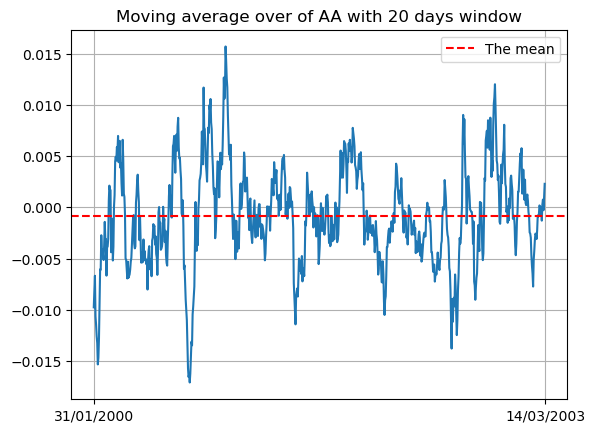

In [105]:
plt.plot(rolling_mean['AA'][19:800])
plt.title('Moving average over of AA with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.grid()
plt.legend()
plt.show()


- La tendance à long terme n'est pas visible, la série temporel semble être volatile on peut faire la standard error mobile pour voir l'écartement autour de cette moyenne mobile 
- En moyenne le return vaut 0 

In [106]:
rolling_std = df.transpose().rolling(window=20).std()

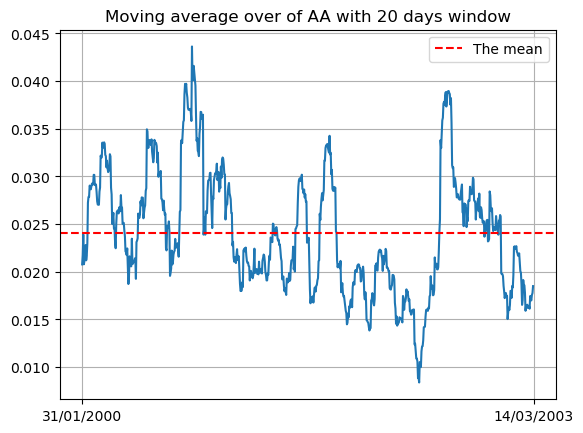

In [107]:
plt.plot(rolling_std['AA'][19:800])
plt.title('Moving average over of AA with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_std['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.grid()
plt.legend()
plt.show()

- Afin de meiux visualiser les données on peut faire une ACP pour voir la dispersion des actifs entre eux.

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [109]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.T)

In [110]:
pca = PCA(n_components=2)  # Vous pouvez ajuster le nombre de composantes principales en fonction de vos besoins
composantes_principales = pca.fit_transform(scaled_data)

In [111]:
df_composantes_principales = pd.DataFrame(data=composantes_principales, columns=['PC1', 'PC2'])

In [112]:
print(df_composantes_principales.shape)

(663, 2)


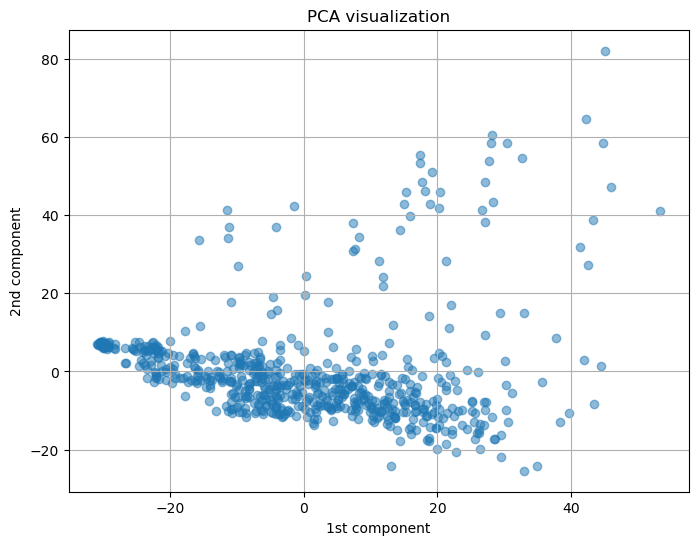

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(df_composantes_principales['PC1'], df_composantes_principales['PC2'], alpha=0.5)
plt.title('PCA visualization')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.grid(True)
plt.show()

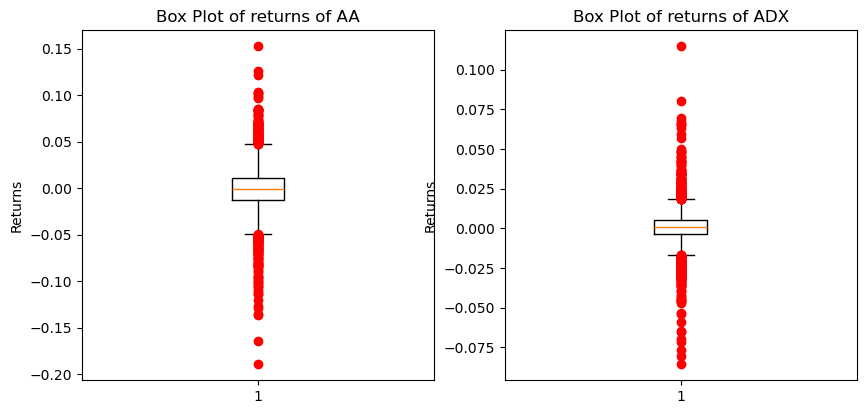

In [114]:
plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.boxplot(df_cleaned['AA'] , sym='ro')
plt.title('Box Plot of returns of AA')
plt.ylabel('Returns')

plt.subplot(2, 2, 2)
plt.boxplot(df_cleaned['ADX'] , sym='ro')
plt.title('Box Plot of returns of ADX')
plt.ylabel('Returns')




plt.show()

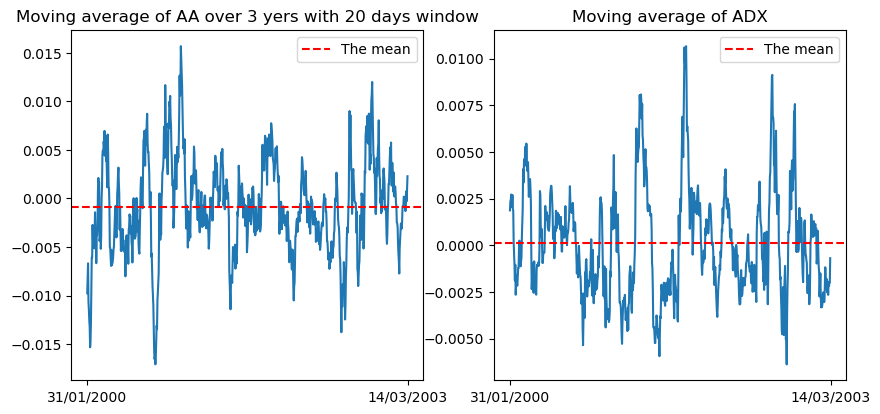

In [115]:
plt.figure(figsize=(10, 10))



plt.subplot(2, 2, 1)
plt.plot(rolling_mean['AA'][19:800])
plt.title('Moving average of AA over 3 yers with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(rolling_mean['ADX'][19:800])
plt.title('Moving average of ADX')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['ADX'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()




plt.legend()
plt.show()

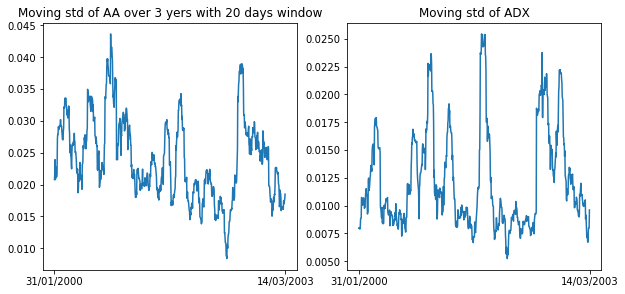

In [18]:
plt.figure(figsize=(10, 10))



plt.subplot(2, 2, 1)
plt.plot(rolling_std['AA'][19:800])
plt.title('Moving std of AA over 3 yers with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])



plt.subplot(2, 2, 2)
plt.plot(rolling_std['ADX'][19:800])
plt.title('Moving std of ADX')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])





plt.show()

In [464]:
df_sub = df_cleaned.sample(20, axis=1, random_state= 42)
df_sub
df_sub.corr()

ticker,LNN,TKR,RY,MIN,HR,OFG,PCG,MHN,KSU,CCK,BTO,IDA,OMC,MFM,RNR,BHE,BAX,PHM,FLS,MGA
ticker,,,,,,,,,,,,,,,,,,,,
LNN,1.000000,0.326828,0.263786,0.019831,0.272773,0.244442,0.056111,0.077950,0.306939,0.178088,0.300182,0.207750,0.268914,0.038711,0.169136,0.233017,0.149932,0.259003,0.332541,0.295564
TKR,0.326828,1.000000,0.381923,0.055278,0.331876,0.302225,0.135014,0.110561,0.419194,0.248974,0.425471,0.252671,0.359167,0.094720,0.214817,0.359317,0.190373,0.351662,0.499456,0.404110
RY,0.263786,0.381923,1.000000,0.120522,0.363027,0.308375,0.146868,0.147396,0.378288,0.193313,0.514895,0.259938,0.356220,0.128446,0.274299,0.269609,0.227840,0.387595,0.379744,0.404265
MIN,0.019831,0.055278,0.120522,1.000000,0.058014,0.013653,0.036671,0.137741,0.049407,0.028128,0.076003,0.064108,0.044031,0.160323,0.048368,0.032286,0.022550,0.092930,0.037110,0.056661
HR,0.272773,0.331876,0.363027,0.058014,1.000000,0.322491,0.166378,0.140137,0.334601,0.218739,0.432167,0.376209,0.315198,0.140985,0.321570,0.300254,0.198978,0.391752,0.324361,0.318393
OFG,0.244442,0.302225,0.308375,0.013653,0.322491,1.000000,0.071206,0.038798,0.264928,0.152245,0.428768,0.201183,0.249610,0.079486,0.200271,0.292537,0.157331,0.292104,0.298651,0.283235
PCG,0.056111,0.135014,0.146868,0.036671,0.166378,0.071206,1.000000,0.083459,0.103655,0.100465,0.167693,0.337667,0.166527,0.043239,0.134690,0.125282,0.152841,0.134806,0.130890,0.129057
MHN,0.077950,0.110561,0.147396,0.137741,0.140137,0.038798,0.083459,1.000000,0.082707,0.027572,0.152439,0.088444,0.054640,0.361863,0.136243,0.059496,0.007359,0.107816,0.043565,0.104744
KSU,0.306939,0.419194,0.378288,0.049407,0.334601,0.264928,0.103655,0.082707,1.000000,0.234050,0.372907,0.265095,0.366198,0.068395,0.238484,0.327057,0.190111,0.371592,0.406492,0.383577


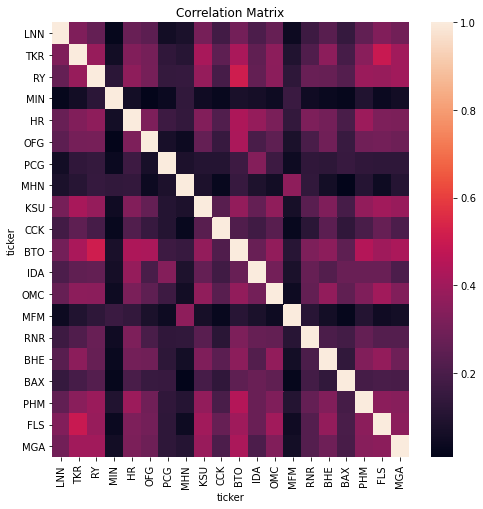

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_sub.corr())
plt.title('Correlation Matrix')
plt.show()

In [73]:
cons = df_cleaned[['AA', 'ABM', 'APD', 'LDL', 'LNN']].mean(axis=1) # industries
phar = df_cleaned[['ABT', 'AZN', 'JNJ', 'NVO', 'LLY']].mean(axis=1) # pharmaceutique
fin = df_cleaned[['ALL', 'AIG', 'ADX', 'AFL', 'AFG']].mean(axis=1) # finance 

In [74]:
from scipy.stats import f_oneway

In [75]:
statistique_F, p_value = f_oneway(cons, phar, fin)

In [76]:
if p_value < 0.05:
    print("Il existe des différences significatives entre les moyennes des groupes.")
else:
    print("Il n'y a pas de différences significatives entre les moyennes des groupes.")

Il n'y a pas de différences significatives entre les moyennes des groupes.


In [77]:
sectors = pd.DataFrame([cons, phar, fin]).T

In [78]:
sectors.columns = ['cons', 'phar', 'fin']

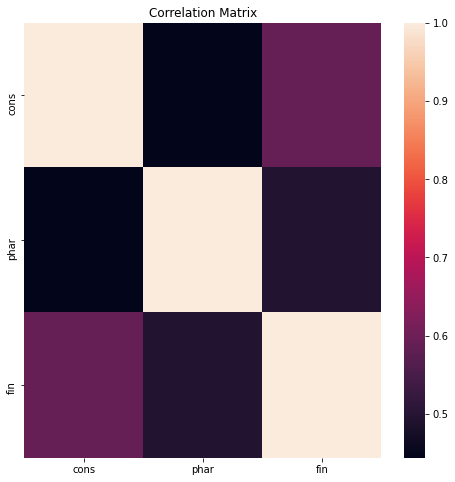

In [79]:
plt.figure(figsize=(8, 8))
sns.heatmap(sectors.corr())
plt.title('Correlation Matrix')
plt.show()

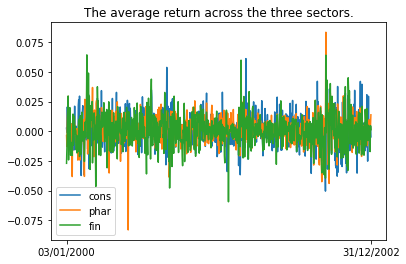

In [80]:
plt.plot(sectors.iloc[:751, 0], label = 'cons')
plt.plot(sectors.iloc[:751, 1], label = 'phar')
plt.plot(sectors.iloc[:751, 2], label = 'fin')
plt.xticks([df_cleaned.index[0],df_cleaned.index[750]])
plt.title('The average return across the three sectors.')
plt.legend()
plt.show()

In [72]:
p_value

0.13368239540496554

- On peut comparer les returns moyens de tous les actifs sur toute la période

In [116]:
data = np.array([df_cleaned.iloc[:, i].mean() for i in range(df_cleaned.shape[1])])

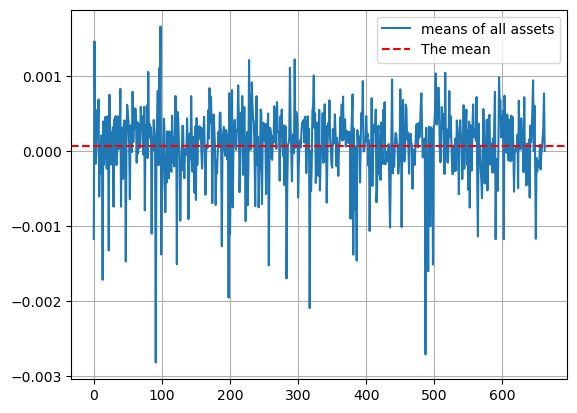

In [117]:
plt.plot(data, label = 'means of all assets')
plt.axhline(y= data.mean(), color='r', linestyle='--', label='The mean')
plt.legend()
plt.grid(True)
plt.show()

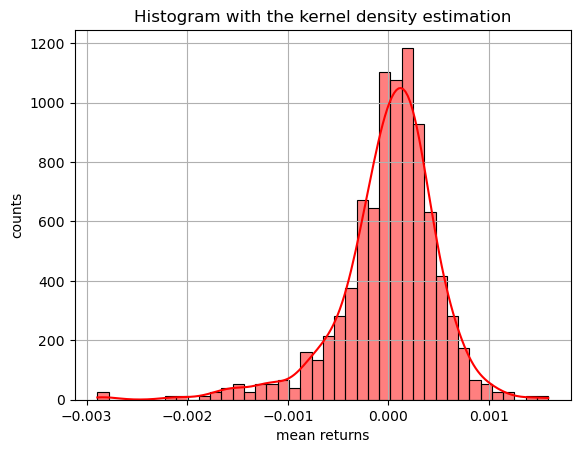

In [535]:
# Création de l'histogramme avec densité estimée

sns.histplot(data, stat = 'density', kde = True, color = 'red') # histogramme et estimation de la densité 




plt.xlabel('mean returns')
plt.ylabel('counts')
plt.title('Histogram with the kernel density estimation')
plt.grid(True)  # Ajoute une grille pour une meilleure visualisation
plt.show()

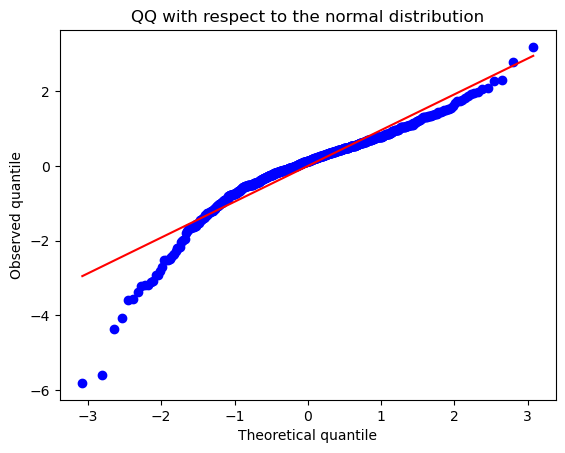

In [536]:
probplot((data - data.mean())/data.var()**(1/2), dist="norm", plot=plt)
plt.title("QQ with respect to the normal distribution")
plt.xlabel("Theoretical quantile")
plt.ylabel("Observed quantile")
plt.show()

In [120]:
data.var(), data.mean()

(2.482300540941159e-07, 7.108695771429356e-05)

In [121]:
shapiro_statistic, p_value = stats.shapiro(data) # Test de Shapiro-Wilk
print("Test de Shapiro-Wilk : Statistique =", shapiro_statistic, ", p-valeur =", p_value)
p_value < 0.01

Test de Shapiro-Wilk : Statistique = 0.9136736312023834 , p-valeur = 5.726549959791238e-19


True

- Clustering des données

In [143]:
from signet.cluster import Cluster 
from scipy import sparse


In [181]:
def signed_adjency(mat):
    '''
    L'idée est ici, à partir d'une matrice de corrélation mat, de renvoyer deux matrices 
    A_positive et A_negative qui correspondraient aux matrices des corrélations positives et négatives 
    associées  
    '''

    A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
    A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
    
    return A_pos, A_neg



def apply_spectral_clustering(correlation_matrix, k):

    A_pos, A_neg = signed_adjency(correlation_matrix)

    for i in range(min(A_pos.shape[0], A_pos.shape[1])):
        A_pos.iat[i, i] = 0

    
    data = (sparse.csc_matrix(A_pos.values), sparse.csc_matrix(A_neg.values))
    
    cluster = Cluster(data)
    
    
    return cluster.spectral_cluster_adjacency(k)

In [474]:
correlation_matrix = df_cleaned.corr()
df_cleaned.corr()

662

In [183]:
l = apply_spectral_clustering(correlation_matrix, k = 6)

/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


In [184]:
res = np.array(l)

/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.apply

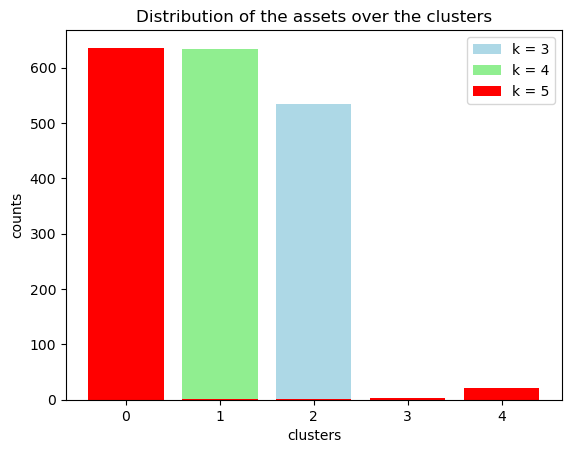

In [219]:
unique_values, counts = np.unique(np.array(apply_spectral_clustering(correlation_matrix, k = 3)), return_counts=True)

# Créer un graphique à barres des fréquences de chaque valeur
plt.bar(unique_values, counts, color='lightblue', label='k = 3')

unique_values, counts = np.unique(np.array(apply_spectral_clustering(correlation_matrix, k = 4)), return_counts=True)


plt.bar(unique_values, counts, color='lightgreen', label='k = 4')



unique_values, counts = np.unique(np.array(apply_spectral_clustering(correlation_matrix, k = 5)), return_counts=True)


plt.bar(unique_values, counts, color='red', label='k = 5')

# Ajouter des étiquettes et un titre
plt.xlabel('clusters')
plt.ylabel('counts')
plt.title('Distribution of the assets over the clusters')

# Afficher la légende
plt.legend()

In [305]:
labels = np.array(apply_spectral_clustering(correlation_matrix, k = 8))

/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


In [306]:
unique_values, counts = np.unique(labels, return_counts=True)

In [307]:
indice = np.where(counts == counts.max())[0][0]
indice

0

In [308]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [309]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.T)

In [310]:
pca = PCA(n_components=2)  # Vous pouvez ajuster le nombre de composantes principales en fonction de vos besoins
composantes_principales = pca.fit_transform(scaled_data)

In [311]:
df_composantes_principales = pd.DataFrame(data=composantes_principales, columns=['PC1', 'PC2'])

In [312]:


category1_indices = [i for i, label in enumerate(labels) if label == indice]

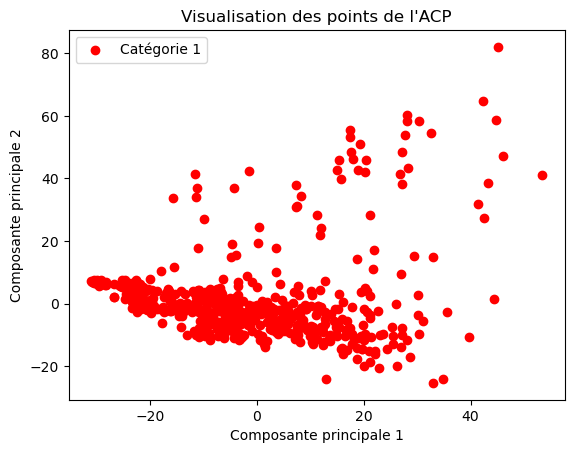

In [316]:
plt.scatter(df_composantes_principales.iloc[category1_indices, 0], df_composantes_principales.iloc[category1_indices, 1], color='red', label='Catégorie 1')




plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Visualisation des points de l\'ACP')

# Afficher la légende
plt.legend()

# Afficher le nuage de points
plt.show()

- Comparaison entre sponge et clustering spectral

In [475]:
def apply_SPONGE(correlation_matrix, k):

    A_pos, A_neg = signed_adjency(correlation_matrix)

    for i in range(min(A_pos.shape[0], A_pos.shape[1])):
        A_pos.iat[i, i] = 0

    
    data = (sparse.csc_matrix(A_pos.values), sparse.csc_matrix(A_neg.values))
    
    cluster = Cluster(data)
    
    
    return cluster.SPONGE(k)




def apply_SPONGE_sym(correlation_matrix, k):

    A_pos, A_neg = signed_adjency(correlation_matrix)

    for i in range(min(A_pos.shape[0], A_pos.shape[1])):
        A_pos.iat[i, i] = 0

    
    data = (sparse.csc_matrix(A_pos.values), sparse.csc_matrix(A_neg.values))
    
    cluster = Cluster(data)
    
    
    return cluster.SPONGE_sym(k)


def apply_signed_laplacian(correlation_matrix, k):
    
    A_pos, A_neg = signed_adjency(correlation_matrix)
    
    for i in range(min(A_pos.shape[0], A_pos.shape[1])):
        A_pos.iat[i, i] = 0
    
    
    data = (sparse.csc_matrix(A_pos.values), sparse.csc_matrix(A_neg.values))
    
    cluster = Cluster(data)
    
    
    return cluster.spectral_cluster_laplacian(k)
    

In [543]:
cl_sp = apply_spectral_clustering(correlation_matrix, k = 20)
cl_s = apply_SPONGE(correlation_matrix, k = 20)
cl_sym = apply_SPONGE_sym(correlation_matrix, k = 20)
cl_sl = apply_signed_laplacian(correlation_matrix, k = 20)


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.apply

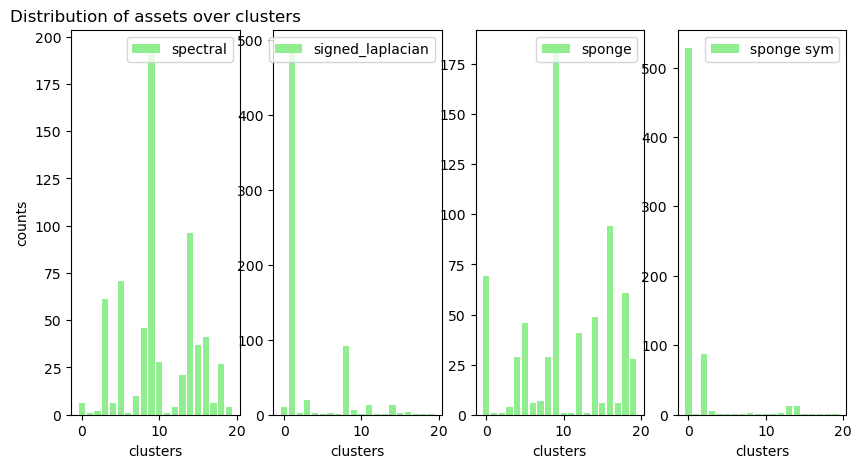

In [544]:

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

unique_values, counts = np.unique(cl_sp, return_counts=True)

# Créer un graphique à barres des fréquences de chaque valeur
axes[0].bar(unique_values, counts, color='lightgreen', label='spectral')
axes[0].set_title('Distribution of assets over clusters')
axes[0].set_xlabel('clusters')
axes[0].set_ylabel('counts')
axes[0].legend()


unique_values, counts = np.unique(cl_sl, return_counts=True)

axes[1].bar(unique_values, counts, color='lightgreen', label='signed_laplacian')
axes[1].set_xlabel('clusters')
axes[1].legend()


unique_values, counts = np.unique(cl_s, return_counts=True)


# Graphique à barres pour les valeurs 2
axes[2].bar(unique_values, counts, color='lightgreen', label='sponge')
axes[2].set_xlabel('clusters')
axes[2].legend()

unique_values, counts = np.unique(cl_sym, return_counts=True)

axes[3].bar(unique_values, counts, color='lightgreen', label='sponge sym')
axes[3].set_xlabel('clusters')
axes[3].legend()






In [561]:

l = []
for k_ in range(2, 21):
    print(k_)

    cl_sp = apply_spectral_clustering(correlation_matrix, k = k_)
    cl_s = apply_SPONGE(correlation_matrix, k = k_)
    

    counts = np.unique(cl_sp, return_counts=True)[1]
    indice_sp = np.where(counts == counts.max())[0][0]
    
    counts = np.unique(cl_s, return_counts=True)[1]
    indice_s = np.where(counts == counts.max())[0][0]

   

    assets_sp = np.where(cl_sp == indice_sp)[0]
    assets_s = np.where(cl_s == indice_s)[0]


    sp_n, s_n = assets_sp.shape[0], assets_s.shape[0]

   

    n = max(sp_n, s_n)

    if assets_sp.shape[0] != n:
        assets_sp =  np.concatenate((assets_sp, np.array([-1 for _ in range(n - assets_sp.shape[0])])))
    if assets_s.shape[0] != n:
        assets_s =  np.concatenate((assets_s, np.array([-2 for _ in range(n - assets_s.shape[0])])))
    
        

    stacked_arrays = np.vstack((assets_sp, assets_s))
    
    # Trouver l'intersection des éléments ligne par ligne
    intersection = np.intersect1d(stacked_arrays[0], stacked_arrays[1])
    for i in range(2, stacked_arrays.shape[0]):
        intersection = np.intersect1d(intersection, stacked_arrays[i])
    
    l.append(intersection.shape[0]/(sp_n + s_n - intersection.shape[0] )* 100)




    

2


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


3


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


4


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


5


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


6


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


7


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


8


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


9


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


10


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


11


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.apply

12


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


13


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


14


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


15


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


16


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


17


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


18


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


19


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


20


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


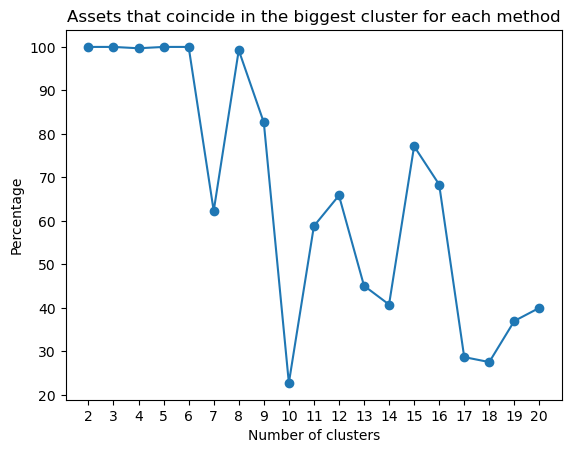

In [562]:
plt.plot([i for i in range(2, 21)], l, marker='o')
plt.xticks([i for i in range(2, 21)])
plt.title('Assets that coincide in the biggest cluster for each method')
plt.ylabel('Percentage')
plt.xlabel('Number of clusters')
plt.show()

In [567]:
l = []
for k_ in range(2, 21):
    print(k_)
    cl_sym = apply_SPONGE_sym(correlation_matrix, k = k_)
    cl_sl = apply_signed_laplacian(correlation_matrix, k = k_)
   
    
    counts = np.unique(cl_sym, return_counts=True)[1]
    indice_sym = np.where(counts == counts.max())[0][0]
    
    counts = np.unique(cl_sl, return_counts=True)[1]
    indice_sl = np.where(counts == counts.max())[0][0]
    
    
    assets_sym = np.where(cl_sym == indice_sym)[0]
    assets_sl = np.where(cl_sl == indice_sl)[0]

    sys_n, sl_n = assets_sym.shape[0], assets_sl.shape[0]
    
    
   

    n = max(sys_n, sl_n)

    if assets_sym.shape[0] != n:
        assets_sym =  np.concatenate((assets_sym, np.array([-1 for _ in range(n - assets_sym.shape[0])])))
    if assets_sl.shape[0] != n:
        assets_sl=  np.concatenate((assets_sl, np.array([-2 for _ in range(n - assets_sl.shape[0])])))
    
        

    stacked_arrays = np.vstack((assets_sym, assets_sl))
    
    # Trouver l'intersection des éléments ligne par ligne
    intersection = np.intersect1d(stacked_arrays[0], stacked_arrays[1])
    for i in range(2, stacked_arrays.shape[0]):
        intersection = np.intersect1d(intersection, stacked_arrays[i])

    
    l.append(intersection.shape[0]/ (sys_n + sl_n - intersection.shape[0]) * 100)



2


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


3


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


4


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


5


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


6


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


7


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


8


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


9


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


10


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


11


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


12


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


13


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


14


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


15


/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


16


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


17


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


18


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


19


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)


20


/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)
/tmp/ipykernel_237/2356686173.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_pos = mat.applymap(lambda x: x if x >= 0 else 0)
/tmp/ipykernel_237/2356686173.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  A_neg = mat.applymap(lambda x: abs(x) if x < 0 else 0)


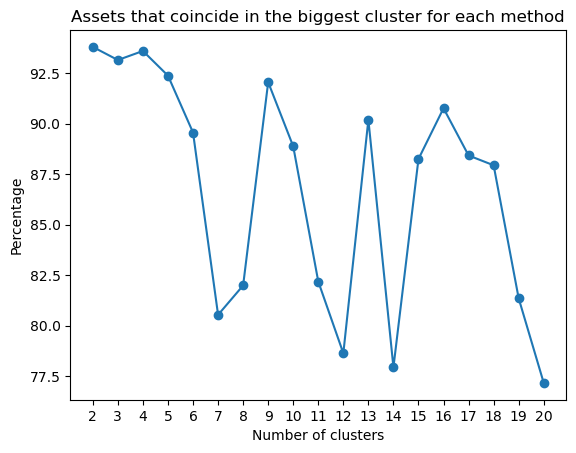

In [568]:
plt.plot([i for i in range(2, 21)], l, marker='o')
plt.xticks([i for i in range(2, 21)])
plt.title('Assets that coincide in the biggest cluster for each method')
plt.ylabel('Percentage')
plt.xlabel('Number of clusters')
plt.show()